# Question 1 Gradient Discent

In [88]:
import numpy as np
import math
import pylab as pl
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
def negativeGaussian(x,mu,Sigma):
    detSigma = np.linalg.det(Sigma)
    n = len(x)
    NC = -((1/(np.sqrt(2*math.pi)**2)*detSigma)) # normalizing constant
    normalizedX = [a - b for a, b in zip(x, mu)] 
    invSigma = np.linalg.inv(Sigma)
    kernel = np.exp(-0.5*(np.inner(np.inner(normalizedX,invSigma),np.transpose(normalizedX))))
    
    value = -NC*kernel
    
    gradient = -value*np.inner(invSigma,normalizedX)
    
    return(value,gradient)
    

In [90]:
def qBowl(x,b,A):
    value = 0.5*np.inner(np.inner(np.transpose(x),A),x) - np.inner(np.transpose(x),b)
    gradient = np.inner(A,x) - b
    return (value,gradient)

In [91]:
a = [25,25]
mu = [1,3.2]
A = [[2,0.3],[0.4,3]]

In [92]:
qBowl(a,mu,A)

(1676.25, array([ 56.5,  81.8]))

In [93]:
0.5*np.inner(np.inner(np.transpose(a),A),a) - np.inner(np.transpose(a),mu)

1676.25

In [203]:
def batchGradientDiscent(function,initGuess,step,threshold,maxIter,*args):
    gradientNorm = []
    epsilon = 1
    value = initGuess
    iteration = 0
    #while iteration > 1:
    #if iteration < maxIter:
    while epsilon > threshold and iteration < maxIter : 
       
        output = function(initGuess,*args)
        #print output
        
        gradient = output[1]
        newValue = value - step * gradient #GDS equation
        
        evaluateOld = function(value,*args)[0] # function evaluated at old point
        #print(evaluateOld)
        evaluateNew = function(newValue,*args)[0]# function evaluated at new point
        print(evaluateNew)
        epsilon = abs(evaluateNew - evaluateOld)
        value = newValue
        gradient= function(value,*args)[1]
        gNorm = np.linalg.norm(gradient)
        gradientNorm.append(gNorm)
        #print epsilon
            

        iteration+=1
        #print(iteration)
          
        
        
    return(gradientNorm, newValue)

In [204]:
# Loading the parameters
def getData():

    # load the parameters for the negative Gaussian function and quadratic bowl function
    # return a tuple that contains parameters for Gaussian mean, Gaussian covariance,
    # A and b for quadratic bowl in order

    data = pl.loadtxt('../DataFiles/HW1/parametersp1.txt')

    gaussMean = data[0,:]
    gaussCov = data[1:3,:]

    quadBowlA = data[3:5,:]
    quadBowlb = data[5,:]

    return (gaussMean,gaussCov,quadBowlA,quadBowlb) 



In [205]:
gaussMean,gaussCov,quadBowlA,quadBowlb = getData()

In [206]:
qBowl(a,quadBowlb,quadBowlA)

(array([[-3806.65440905, -4111.37030486],
        [-4111.37030486, -3806.65440905]]),
 array([[-289.59784498, -344.79892249],
        [-344.79892249, -289.59784498]]))

In [207]:
quadBowlb

array([ 400.,  400.])

In [208]:
np.inner(np.linalg.inv(quadBowlA),quadBowlb)

array([ 26.66666667,  26.66666667])

In [209]:
batchGradientDiscent(negativeGaussian,[2,10],0.01,1e-19,100,gaussMean,gaussCov)

129437.109306
93358.6367714
57837.5378349
30776.8870512
14066.9253838
5522.46886294
1862.20276418
539.361890017
134.181655587
28.6725047997
5.26256800658
0.829639473384
0.112341622565
0.0130662684352
0.00130533522906
0.000112008799133
8.25547035223e-06
5.22626108868e-07
2.84184234341e-08
1.32729805772e-09
5.32471706262e-11
1.83478090507e-12
5.43039582304e-14
1.3805061969e-15
3.01442743217e-17
5.65367585434e-19
9.10786481794e-21
1.26026491484e-22


([2631.6387827169187,
  3049.3561235755292,
  2602.3552711381558,
  1764.3045992449674,
  979.86044015181801,
  452.77867758878426,
  175.64270694115481,
  57.523630760067945,
  15.965292876858525,
  3.7651038174098694,
  0.75594419554091352,
  0.12940459778621763,
  0.018908029125574103,
  0.0023602871127345305,
  0.00025189201672016641,
  2.2995691047403345e-05,
  1.7966706180553682e-06,
  1.2018590040113836e-07,
  6.8856921250447764e-09,
  3.3796748334916209e-10,
  1.4214842558119795e-11,
  5.1243778186918096e-13,
  1.5836250754466246e-14,
  4.1961011981368358e-16,
  9.5341884328560408e-18,
  1.8578918990509584e-19,
  3.1053086355170604e-21,
  4.4522569130445959e-23],
 array([-343.2794463,   10.       ]))

In [199]:
print np.linalg.norm(quadBowlA)
print quadBowlb

15.8113883008
[ 400.  400.]


In [200]:
A = qBowl([20,0],quadBowlb,quadBowlA)[0]
B = qBowl([20,0],quadBowlb,quadBowlA)[1]
C = B*0.01
print [20,0] - C
qBowl([22,3],quadBowlb,quadBowlA)[0]

[ 22.   3.]


-7205.0

In [201]:
#batchGradientDiscent(qBowl,[26,26],0.001,1e-1,10,quadBowlb,quadBowlA)
#np.linalg.norm()
print SP1
diff = [a-b for a,b in zip(SP1,gaussMean)]
A = -negativeGaussian(SP1,gaussMean,gaussCov)[0]*np.inner(np.linalg.inv(gaussCov),diff)
1/np.linalg.norm(A)
#np.inner(np.linalg.inv(gaussCov),diff)

[ 10.57619634  11.44783946]


0.0040370230690824028

Quadratic bowl shows some very erratic behavior unless the startiing point is very clos
and the threshold is relatively larger

In [210]:
# Effect of staritng guess
# Add random noise to the analtyical solution (Close to the solution, a bit far and then very far from the solution)
# For neagtive Gaussain
NGAnalyticSoln = gaussMean
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
print SP1
diff = [a-b for a,b in zip(SP1,gaussMean)]
stepNorm = 1/(np.linalg.norm(-negativeGaussian(SP1,gaussMean,gaussCov)[0]*np.inner(np.linalg.inv(gaussCov),diff)))
print stepNorm
#- negativeGaussian(SP1,gaussMean,gaussCov)*np.inner(np.linalg.inv(gaussCov),SP1 - gaussMean)
batchGradientDiscent(negativeGaussian,SP1,stepNorm,1e-3,200,gaussMean,gaussCov)

[  9.93063364  13.78372518]
0.00167223444185
157343.790169
156514.521793
155534.012207
154405.162784
153131.298542
151716.151823
150163.844082
148478.865893
146666.055315
144730.57477
142677.886569
140513.727276
138244.081045
135875.152134
133413.336752
130865.194425
128237.419056
125536.809862
122770.242359
119944.639558
117066.94356
114144.087686
111182.969312
108190.423538
105173.197843
102137.927836
99091.1142224
96039.1010927
92988.0556121
89943.9492009
86912.5402641
83899.3585247
80909.691001
77948.5696538
75020.7607203
72130.7557356
69282.7642337
66480.7081084
63728.2176019
61028.6288821
58384.9831569
55800.0272691
53276.215703
50815.7139334
48420.403034
46091.8854646
43831.491947
41640.2893383
39519.0894082
37468.4584242
35488.7274485
33580.0032498
31742.1797357
29974.9498094
28277.8175612
26650.1107032
25090.9931628
23599.4777521
22174.438835
20814.6249183
19518.6710994
18285.1113044
17112.3902613
15998.8751533
14942.8669051
13942.6110613
12996.3082187
12102.123983
11258.19842

([752.7894877929175,
  905.33649033620986,
  1055.1988811667386,
  1201.9455219946274,
  1345.1606014543231,
  1484.4455936805159,
  1619.4210984959786,
  1749.7285513743777,
  1875.0317924804319,
  1995.0184853142898,
  2109.4013767836555,
  2217.9193918823917,
  2320.3385575538973,
  2416.4527517470956,
  2506.0842751177352,
  2589.0842442734224,
  2665.3328068929609,
  2734.7391804553135,
  2797.2415176773075,
  2852.8066030694149,
  2901.4293862636337,
  2943.1323589357235,
  2977.9647832259052,
  3006.0017805489142,
  3027.3432905684563,
  3042.1129108865102,
  3050.45662865959,
  3052.5414558985944,
  3048.5539806340134,
  3038.6988464332694,
  3023.1971729423421,
  3002.2849301914071,
  2976.2112793569299,
  2945.236892514823,
  2909.6322636559257,
  2869.6760228725607,
  2825.6532651701846,
  2777.8539048190219,
  2726.5710655454391,
  2672.0995161806086,
  2614.7341606439923,
  2554.7685903509418,
  2492.4937063068769,
  2428.196417294826,
  2362.1584196881349,
  2294.65506353

# Question 2

In [25]:
def finiteDifference(function,sp,h,*args):

    fdApprox = []
    for i in range(len(sp)):
        Lower = [float(j) for j in sp]
        Higher = [float(j) for j in sp]
        Lower[i] = Lower[i] - 0.5*h
        #print Lower
        Higher[i] = Higher[i] + 0.5*h
        #print Lower
        #print Higher
        higherValue = function(Higher,*args)[0]
        lowerValue = function(Lower,*args)[0]
        print higherValue
        print lowerValue
        fdApprox.append((higherValue - lowerValue)/h)
        #increment = [0.5*h + b for  b in sp]
        #higherInput = [a + b for a, b in zip(sp, increment)] 
        #lowerInput = [a - b for a, b in zip(sp, increment)]
        #higher = function( higherInput,*args)[0]
        #lower = function(lowerInput,*args)[0]
        #fdApprox = (higher - lower)/h
    return(fdApprox)


In [26]:
finiteDifference(qBowl,[1,2],10000,quadBowlb,quadBowlA)

123098835.0
126898835.0
123123835.0
126873835.0


[-380.0, -375.0]

In [27]:
qBowl([1,2],quadBowlb,quadBowlA)

(-1165.0, array([-380., -375.]))

In [28]:
A = [32,23]
A[1] = A[1]+23
A
[float(i) for i in A]

[32.0, 46.0]

In [29]:
A = [2,3]
B = [23,4]
[0.5 + b for  b in A] 


[2.5, 3.5]

# # Data for SGD

In [30]:
# Loading the data

def getData():
    
    # load the fitting data for X and y and return as elements of a tuple
    # X is a 100 by 10 matrix and y is a vector of length 100
    # Each corresponding row for X and y represents a single data sample

    X = pl.loadtxt('../DataFiles/HW1/fittingdatap1_x.txt')
    y = pl.loadtxt('../DataFiles/HW1/fittingdatap1_y.txt')

    return (X,y) 

In [31]:
X,y = getData()

In [32]:
X.shape

(100, 10)

In [33]:
A = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X))

In [34]:
sp = np.inner(A,y)
sp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

Least Square function

In [35]:
def leastSquare(theta,X,y):
    y = y.ravel()
    intermediate = np.inner(X,theta) - y
    value = np.inner(np.transpose(intermediate),intermediate)
    gradient = 2*np.inner(np.transpose(X),intermediate)
        
    return(value,gradient)


In [36]:
theta = [1,2,3,4,-5,6,7,8,9,-10]

In [37]:
#leastSquare(sp,X[1,],y[1])[1]

In [38]:
print np.linalg.norm((leastSquare(sp,X,y)[1]))
print leastSquare(sp,X,y)[1]

8.08898029578e-10
[  7.22795585e-11   3.46213943e-11   7.47740492e-11  -3.55712868e-11
   2.15244461e-11  -1.43022159e-10   8.23569515e-12   6.10197803e-11
  -6.08653302e-10  -4.95850632e-10]


In [39]:
sp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [40]:
batchGradientDiscent(leastSquare,sp,0.01,1e-19,36,X,y)

1.27329258248e-11
1
3.63797880709e-12
2
1.45519152284e-11
3
2.0008883439e-11
4
1.27329258248e-11
5
1.81898940355e-12
6
1.45519152284e-11
7
1.81898940355e-12
8
1.27329258248e-11
9
0.0
10


[7.9660930842840948e-07,
 1.594041477882827e-06,
 2.3914663574340702e-06,
 3.1888408460146198e-06,
 3.9862837026355625e-06,
 4.7837352369274375e-06,
 5.5811240962023485e-06,
 6.3785109611052526e-06,
 7.1759815794085644e-06,
 7.973326024409016e-06]

In [41]:
Xsub = X[0:5,:]
ysub = y[0:5]
Xsub

array([[ -1.47200000e-01,   4.90200000e-01,  -2.26757000e+01,
          1.47657000e+01,   1.07925000e+01,  -1.73419000e+01,
         -7.58150000e+00,  -1.65327000e+01,  -6.71740000e+00,
          2.75220000e+00],
       [ -2.66000000e-02,  -3.50944000e+01,  -3.24594000e+01,
          4.04050000e+00,  -2.68454000e+01,  -1.55490000e+01,
          1.36408000e+01,  -5.82570000e+00,  -1.99688000e+01,
          2.02079000e+01],
       [  8.57100000e+00,   2.83335000e+01,  -2.60000000e-01,
          1.67877000e+01,   7.97380000e+00,   2.50168000e+01,
         -1.62684000e+01,   6.49319000e+01,   3.74096000e+01,
          4.14010000e+00],
       [ -9.33650000e+00,   1.46148000e+01,   1.53803000e+01,
         -8.95000000e+00,   1.33843000e+01,   1.17449000e+01,
         -2.25900000e-01,   4.37849000e+01,  -2.18766000e+01,
         -2.06200000e+00],
       [ -1.07327000e+01,  -1.05070000e+01,  -1.08115000e+01,
         -2.29077000e+01,  -6.43280000e+00,  -5.86710000e+00,
         -1.65026000e+01

inf

# Stochastic Gradient Discent

In [85]:
def stochasticGradientDiscent(X,Y,initGuess,threshold,maxIter,tau0,kappa):
    gradientNorm = []
    epsilon = float("Inf")
    value = initGuess
    iteration = 0

    n = X.shape[0]
    print n
    indTheta = initGuess
    k = kappa
    steps = 0
    iteration = 0
    
    
    while iteration < maxIter: 
        for i in range(n):
            if epsilon > threshold:
            
                indX = X[i,]
                #print indX
                indY = Y[i]
                y = indY.ravel()
                intermediate = np.inner(indX,indTheta) - y
                #print intermediate
                #print intermediate
                value = np.inner(np.transpose(intermediate),intermediate)
                #print value
                gradient = 2*np.transpose(indX)*intermediate
                
                #print(value)
                #print gradient
                
                #print(np.linalg.norm(gradient))
                
                etaT = (1./((tau0+steps)*np.linalg.norm(gradient)))**k
                #print etaT
                newTheta = indTheta - etaT*gradient
                newIntermediate = np.inner(indX,newTheta) - y
                
                newValue = np.inner(np.transpose(newIntermediate),newIntermediate)
                #print(newValue)
                epsilon = abs(newValue - value)
                #epsilon = np.linalg.norm(gradient)
                print(epsilon)
                #print(newTheta)
                #print indTheta
                steps= steps +1            
                indTheta = newTheta
                #print(indTheta)
                #print steps
            else:
                print "SGD converged"
                break
                
                
        iteration = iteration+1
                
        return(indTheta)

In [86]:
a = np.inner(X[0,],sp) - y[0]
print X[0,]
nu = np.linalg.norm(2*np.transpose(X[0,])*a)
eta = (1./((2+1)*nu))**0.9
print sp - eta*nu
print sp

[ -0.1472   0.4902 -22.6757  14.7657  10.7925 -17.3419  -7.5815 -16.5327
  -6.7174   2.7522]
[ -0.17906413  -3.01911302  -6.99901854   6.12998285  -1.74569812
   5.99237576   2.72948618  -1.13805415 -13.62825289  15.0505799 ]
[  0.5032541   -2.3367948   -6.31670032   6.81230107  -1.06337989
   6.67469398   3.4118044   -0.45573592 -12.94593466  15.73289812]


In [88]:
stochasticGradientDiscent(X,y,[0.1]*10,0.01,3,5,0.9)

100
10460.6593366
71556.559941
21764.0770119
6060.60629305
2044.06971037
19678.3452176
2195.90170234
3720.62156009
445.112395089
6402.92113386
2537.44301217
386.25658546
11.7240029769
5607.48809489
8319.41993468
5458.99303467
2524.62380019
6983.85689304
4771.01262829
7482.36844648
8.54160637803
11822.5722185
832.079696736
4840.1156225
3414.75267068
3901.48327822
15805.2968008
27741.9604156
4536.92749062
7669.94783293
16681.4338136
3661.01880934
6979.97968873
2298.78650449
3858.27219572
5864.30117108
1188.47975406
13643.061873
3171.53106854
1321.15514649
10987.4697831
4843.88907543
7705.1216412
3417.9820263
510.227909797
10686.7054568
5901.13872074
1909.54427694
269.060689709
9805.93328885
7784.24279713
1259.2189907
3761.81378259
2586.36943613
6737.41899108
2157.90594486
535.448260282
6350.04717595
1600.52341548
13.6127102929
3662.18543098
3623.40791398
2795.35709597
5420.78091158
376.512539342
1639.96552444
1287.20007127
3553.8574752
2042.02280826
2598.13513156
3387.64626042
2515.38806

array([-0.05674999, -0.43179969, -0.67160093,  0.15273771, -0.27350125,
        0.12975445,  0.02719175, -0.76885618, -2.62694465,  1.89948989])

In [76]:
i = 1
indTheta = sp
indX = X[i,]
indY = y[i]
value = (np.inner(np.transpose(indX),indTheta) - indY)**2
gradient = 2*(np.inner(np.transpose(indX),indTheta) - indY)*indX
#print value,gradient
#print np.linalg.norm(gradient)
tau0 = 2
k = 0.8
j = 1
etaT = (1./(tau0+(j+1)))**k
print etaT
newTheta = indTheta - etaT*gradient
#print gradient
#print etaT*gradient
print newTheta
print np.inner(np.transpose(indX),indTheta) - indY
#2*(np.inner(np.transpose(indX),newTheta) - indY)*indX

0.329876977693
[  2.27496097e-01  -3.66154899e+02  -3.42818175e+02   4.86995266e+01
  -2.79365403e+02  -1.54519334e+02   1.44823824e+02  -6.08498480e+01
  -2.19959331e+02   2.25225007e+02]
-15.7131943321


In [230]:
sp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [122]:
sp

array([-41.31766813,  -0.82708803,  -7.06071553,  34.42502081,
       -30.18680803,  -0.67330762,  15.95421946,   3.48234334,
         6.73856983, -15.40532608])

In [ ]:
indX = X[i,]
indY = y[i]
value = (np.inner(np.transpose(indX),sp) - indY)**2
value
2*(np.inner(np.transpose(indX),sp) - indY)*indX

In [ ]:
def additional(function,f,d,*args):
    return(function(*args)+f**d)


In [ ]:
add(23,31)

In [ ]:
additional(mult,23,2,12,3)

In [ ]:
23**2

In [ ]:
abs(23-132)

In [ ]:
 x = np.arange(30).reshape(6,5)

In [ ]:
x[:,1]

In [ ]:
data = pl.loadtxt('../DataFiles/HW1/curvefittingp2.txt')

## Linear Basis Function Regression

In [27]:
# Data for question 2
import matplotlib.pyplot as plt
import pylab as pl

def getData(ifPlotData=True):
    # load the fitting data and (optionally) plot out for examination
    # return the X and Y as a tuple

    data = pl.loadtxt('../DataFiles/HW1/curvefittingp2.txt')

    X = data[0,:]
    Y = data[1,:]

    if ifPlotData:
        plt.plot(X,Y,'o')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return (X,Y)

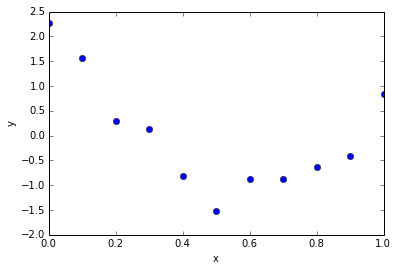

In [28]:
X,Y = getData(ifPlotData=True)


In [29]:
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [30]:
def LBFRegression(X,y,m):
    designMat = np.zeros((len(X),m+1))
    for i in range(m+1):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        
        
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)

### 2.1

In [31]:
xtrue = np.linspace(0,1,100) # 100 linearly spaced numbers
ytrue = np.cos(np.pi*xtrue)+1.5*np.cos(2*np.pi*xtrue) # computing the values of sin(x)/x
noise = np.random.normal(0,0.01,100)
ytrue = ytrue+noise


weights0 = LBFRegression(X,Y,0)[0]
m = 0
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue0 = np.inner(designMat,np.transpose(weights0))

weights1 = LBFRegression(X,Y,1)[0]
m = 1
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue1 = np.inner(designMat,np.transpose(weights1))



weights3 = LBFRegression(X,Y,3)[0]
m = 3
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue3 = np.inner(designMat,np.transpose(weights3))



weights10 = LBFRegression(X,Y,10)[0]
m = 10
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]

weights10 = LBFRegression(X,Y,10)[0]
fValue10 = np.inner(designMat,np.transpose(weights10))

In [32]:
fValue10


array([ 2.28013448,  1.79391397,  1.58741861,  1.5457288 ,  1.58651516,
        1.65331598,  1.70983853,  1.73517068,  1.71979784,  1.6623286 ,
        1.56684075,  1.44076631,  1.293242  ,  1.13385782,  0.97174315,
        0.81493557,  0.66998334,  0.54173782,  0.43329704,  0.34606615,
        0.27990509,  0.23333752,  0.20379884,  0.18790481,  0.18172494,
        0.18104813,  0.1816304 ,  0.17941703,  0.17073339,  0.15244098,
        0.1220563 ,  0.07783235,  0.01880309, -0.05520715, -0.14360672,
       -0.24508887, -0.3577091 , -0.47898339, -0.60600257, -0.73555824,
       -0.86427529, -0.9887464 , -1.10566406, -1.21194574, -1.30484852,
       -1.38206954, -1.44182946, -1.48293648, -1.50482898, -1.50759572,
       -1.49197285, -1.45931786, -1.41156108, -1.35113614, -1.28089117,
       -1.20398342, -1.1237602 , -1.04362973, -0.96692591, -0.89677134,
       -0.83594315, -0.78674658, -0.7509011 , -0.7294441 , -0.72265688,
       -0.7300174 , -0.75018398, -0.7810136 , -0.81961741, -0.86

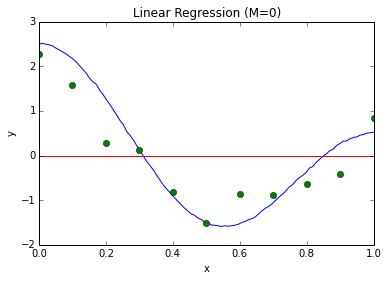

In [33]:
from pylab import savefig

plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=0)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis0.pdf')

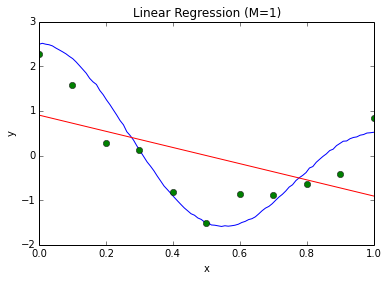

In [34]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=1)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis1.pdf')

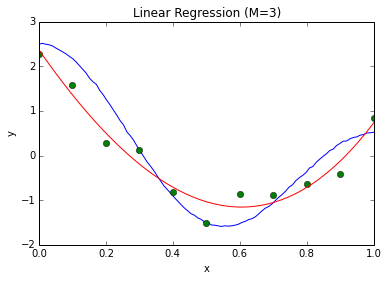

In [35]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=3)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis3.pdf')

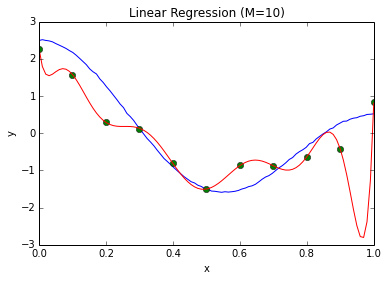

In [36]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=10)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis10.pdf')

# SSE

In [37]:
def SSEPolynomialBasis(weight,X,y):
    error = np.inner(X,np.transpose(weight)) - y
    SSE =np.inner(error,np.transpose(error))
    SSEderivative = 2*np.inner(np.transpose(X),error)
    return(SSE,SSEderivative)

In [38]:
weights3 = LBFRegression(X,Y,3)[0]
m = 3
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue3 = np.inner(designMat,np.transpose(weights3))
print weights3

[  2.36687552 -10.73144911   6.61648601   2.48074981]


In [39]:
np.linalg.norm(SSEPolynomialBasis(weights3,designMat,ytrue)[1])

35.980577281002972

In [40]:
weight3high = weights3+0.2
weight3Low = weights3-0.2
a = SSEPolynomialBasis(weight3high,designMat,ytrue)[0]
b = SSEPolynomialBasis(weight3Low,designMat,ytrue)[0]
print a,b

29.948543446 51.3779561676


Numerical derviative for the SSE

In [41]:
finiteDifference(SSEPolynomialBasis,weights3,0.02,designMat,ytrue)

NameError: name 'finiteDifference' is not defined

In [42]:
batchGradientDiscent(SSEPolynomialBasis,weights3,0.001,0.01,100,designMat,ytrue)

NameError: name 'batchGradientDiscent' is not defined

# 2.3 Cosine basis function

In [43]:
def CosBFRegression(X,y,m):
    designMat = np.zeros((len(X),m))
    for i in range(1,m+1):
        
        #print np.cos(i*np.pi*X)
        designMat[:,i-1] = np.cos(i*np.pi*X)
        
        
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle)

In [44]:
Y

array([ 2.2748,  1.5728,  0.2885,  0.1237, -0.81  , -1.5123, -0.8655,
       -0.8766, -0.6274, -0.4159,  0.8383])

In [45]:
cosBasis1 = np.append(CosBFRegression(X,Y,1),[0]*7)
cosBasis2 = np.append(CosBFRegression(X,Y,2),[0]*6)
cosBasis3 = np.append(CosBFRegression(X,Y,3),[0]*5)
cosBasis4 = np.append(CosBFRegression(X,Y,4),[0]*4)
cosBasis5 = np.append(CosBFRegression(X,Y,5),[0]*3)
cosBasis6 = np.append(CosBFRegression(X,Y,6),[0]*2)
cosBasis7 = np.append(CosBFRegression(X,Y,7),[0]*1)
cosBasis8 = np.append(CosBFRegression(X,Y,8),[0]*0)

In [46]:
TrueCosBasis = np.array([1,1.5,0,0,0,0,0,0])
def euclideanDistanceTrueCos(Vector):
    return np.linalg.norm(TrueCosBasis - Vector)
    
EuclideanDistance = [euclideanDistanceTrueCos(cosBasis1),euclideanDistanceTrueCos(cosBasis2),euclideanDistanceTrueCos(cosBasis3),euclideanDistanceTrueCos(cosBasis4),
                    euclideanDistanceTrueCos(cosBasis5),euclideanDistanceTrueCos(cosBasis6),euclideanDistanceTrueCos(cosBasis7),euclideanDistanceTrueCos(cosBasis8)]
EuclideanDistance 
MVector = range(1,9)
MVector

[1, 2, 3, 4, 5, 6, 7, 8]

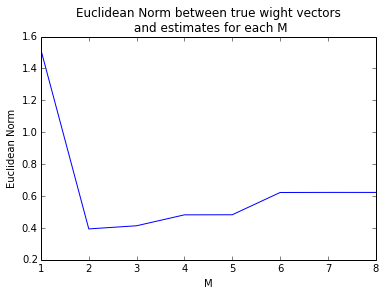

In [47]:
plt.plot(MVector,EuclideanDistance)

plt.xlabel('M')
plt.ylabel('Euclidean Norm')
plt.title('Euclidean Norm between true wight vectors\n and estimates for each M')

plt.show()
pl.savefig('../ImageFiles/HW1/CosBasisDifference.pdf')

In [48]:
np.cos(4*np.pi*X)

array([ 1.        ,  0.30901699, -0.80901699, -0.80901699,  0.30901699,
        1.        ,  0.30901699, -0.80901699, -0.80901699,  0.30901699,  1.        ])

# Ridge Regression 

In [49]:
# Data for question 3

import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def regressAData():
    return getData('../DataFiles/HW1/regressA_train.txt')

def regressBData():
    return getData('../DataFiles/HW1/regressB_train.txt')

def validateData():
    return getData('../DataFiles/HW1/regress_validate.txt')

In [50]:
def ridgeRegression(X,y,lambdaShrink,m):
    designMat = np.zeros((len(X),m+1))
    for i in range(m+1):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        designMat[:,i] = [j - np.mean(y) for j in designMat[:,i]] # Centering X's
        
    y = y.ravel() 
    
    yCentered = [j - np.mean(y) for j in y] # Centering y's
    
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)+lambdaShrink*np.identity(m+1)),np.transpose(designMat)),yCentered)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)
    

Ridge regression fit for M = 1 for various lamdas

In [51]:
RRLambda0_1M1 = ridgeRegression(X,Y,0.1,1)[0]
RRLambda0_5M1 = ridgeRegression(X,Y,0.5,1)[0]
RRLambda1M1 = ridgeRegression(X,Y,1,1)[0]
RRLambda2M1 = ridgeRegression(X,Y,2,1)[0]
RRLambda5M1 = ridgeRegression(X,Y,5,1)[0]
W1 = ['w0','w1']
RRLambda2M1

array([ 0.23968251, -0.56587693])

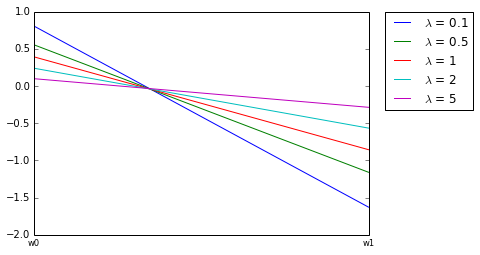

In [52]:
#plt.bar(range(len(t12)), t12, align='center')
#plt.xticks(range(len(t12)), t11, size='small')
#plt.show()
plt.plot(range(len(RRLambda0_1M1)),RRLambda0_1M1,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M1)),RRLambda0_5M1,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M1)),RRLambda1M1,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M1)),RRLambda2M1,label='$\lambda$ = 2')
plt.plot(range(len(RRLambda5M1)),RRLambda5M1,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ridge regression fit for M = 3 for various lamdas

In [53]:
RRLambda0_1M3 = ridgeRegression(X,Y,0.1,3)[0]
RRLambda0_5M3 = ridgeRegression(X,Y,0.5,3)[0]
RRLambda1M3 = ridgeRegression(X,Y,1,3)[0]
RRLambda2M3 = ridgeRegression(X,Y,2,3)[0]
RRLambda5M3 = ridgeRegression(X,Y,5,3)[0]
W1 = ['w0','w1','w2','w3']
RRLambda2M1

array([ 0.23968251, -0.56587693])

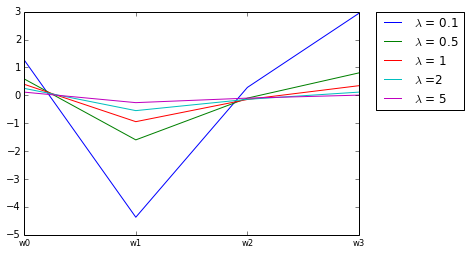

In [54]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M3)),RRLambda0_1M3,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M3)),RRLambda0_5M3,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M3)),RRLambda1M3,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M3)),RRLambda2M3,label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M3)),RRLambda5M3,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ridge regression fit for M = 5 for various lamdas

In [55]:
RRLambda0_1M5 = ridgeRegression(X,Y,0.1,5)[0]
RRLambda0_5M5 = ridgeRegression(X,Y,0.5,5)[0]
RRLambda1M5 = ridgeRegression(X,Y,1,5)[0]
RRLambda2M5 = ridgeRegression(X,Y,2,5)[0]
RRLambda5M5 = ridgeRegression(X,Y,5,5)[0]
W1 = ['w0','w1','w2','w3','w4','w5']
RRLambda2M1

array([ 0.23968251, -0.56587693])

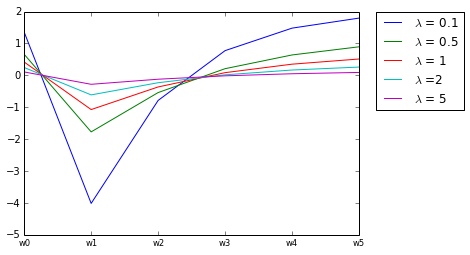

In [56]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M5)),RRLambda0_1M5,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M5)),RRLambda0_5M5,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M5)),RRLambda1M5,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M5)),RRLambda2M5,label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M5)),RRLambda5M5,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ridge regression fit for M = 10 for various lamdas

In [57]:
RRLambda0_1M10 = ridgeRegression(X,Y,0.1,10)[0]
RRLambda0_5M10 = ridgeRegression(X,Y,0.5,10)[0]
RRLambda1M10 = ridgeRegression(X,Y,1,10)[0]
RRLambda2M10 = ridgeRegression(X,Y,2,10)[0]
RRLambda5M10 = ridgeRegression(X,Y,5,10)[0]
W1 = ['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9','w10']
RRLambda2M1

array([ 0.23968251, -0.56587693])

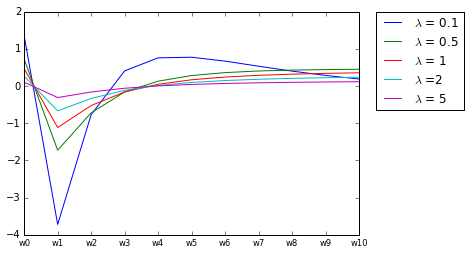

In [58]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M10)),RRLambda0_1M10,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Test 1

In [59]:
Train1_X = regressAData()[0]
Train1_Y = regressAData()[1]
Test1_X = regressBData()[0]
Test1_Y = regressBData()[1]
valid1_X =validateData()[0]
valid1_Y = validateData()[1]

In [60]:
def LBFRidgeRegression(theta,X,y,lambda_shrinkage):
    params = len(theta)
    #print (m)
    designMat = np.zeros((len(X),params))
    for i in range(params):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        #designMatTemp[:,i] = [a**i for a in X]
        designMat[:,i] = [j - np.mean(y) for j in designMat[:,i]] # Centering X's
    
    y = y.ravel() 
    yCentered = [j - np.mean(y) for j in y]  # Centering y's
    
    
    fittedValues = np.dot(designMat,np.transpose(theta))
    fittedDifference = [a - b for a, b in zip(fittedValues,yCentered)]
    RSS = sum(a**2 for a in fittedDifference)+lambda_shrinkage*np.dot(theta,np.transpose(theta))
    return(fittedValues,RSS)

In [61]:
# Lambdas to be tested are 0.1,0.5,1,2,3,5 and the M's are 1,3,5,10
ridgeParam = ridgeRegression(valid1_X,valid1_Y,0.6,1)[0]

#ridgeParam

In [62]:
LBFRidgeRegression(ridgeParam,valid1_X,valid1_Y,1)[1]

14.386760182846109

M =  1

In [63]:
ridgeParamLambda0_1M1 = ridgeRegression(Train1_X,Train1_Y,0.1,1)[0]
ridgeParamLambda0_5M1 = ridgeRegression(Train1_X,Train1_Y,0.5,1)[0]
ridgeParamLambda1M1 = ridgeRegression(Train1_X,Train1_Y,1,1)[0]
ridgeParamLambda2M1 = ridgeRegression(Train1_X,Train1_Y,2,1)[0]
ridgeParamLambda5M1 = ridgeRegression(Train1_X,Train1_Y,5,1)[0]

In [64]:
errorLambda0_1M1 = LBFRidgeRegression(ridgeParamLambda0_1M1,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M1 = LBFRidgeRegression(ridgeParamLambda0_5M1,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M1 = LBFRidgeRegression(ridgeParamLambda1M1,valid1_X ,valid1_Y,1)[1]
errorLambda2M1 = LBFRidgeRegression(ridgeParamLambda2M1,valid1_X ,valid1_Y,2)[1]
errorLambda5M1 = LBFRidgeRegression(ridgeParamLambda5M1,valid1_X ,valid1_Y,5)[1]


M = 3

In [65]:
ridgeParamLambda0_1M3 = ridgeRegression(Train1_X,Train1_Y,0.1,3)[0]
ridgeParamLambda0_5M3 = ridgeRegression(Train1_X,Train1_Y,0.5,3)[0]
ridgeParamLambda1M3 = ridgeRegression(Train1_X,Train1_Y,1,3)[0]
ridgeParamLambda2M3 = ridgeRegression(Train1_X,Train1_Y,2,3)[0]
ridgeParamLambda5M3 = ridgeRegression(Train1_X,Train1_Y,5,3)[0]

In [66]:
errorLambda0_1M3 = LBFRidgeRegression(ridgeParamLambda0_1M3,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M3 = LBFRidgeRegression(ridgeParamLambda0_5M3,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M3 = LBFRidgeRegression(ridgeParamLambda1M3,valid1_X ,valid1_Y,1)[1]
errorLambda2M3 = LBFRidgeRegression(ridgeParamLambda2M3,valid1_X ,valid1_Y,2)[1]
errorLambda5M3 = LBFRidgeRegression(ridgeParamLambda5M3,valid1_X ,valid1_Y,5)[1]

M = 5

In [67]:
ridgeParamLambda0_1M5 = ridgeRegression(Train1_X,Train1_Y,0.1,5)[0]
ridgeParamLambda0_5M5 = ridgeRegression(Train1_X,Train1_Y,0.5,5)[0]
ridgeParamLambda1M5 = ridgeRegression(Train1_X,Train1_Y,1,5)[0]
ridgeParamLambda2M5 = ridgeRegression(Train1_X,Train1_Y,2,5)[0]
ridgeParamLambda5M5 = ridgeRegression(Train1_X,Train1_Y,5,5)[0]

In [68]:
errorLambda0_1M5 = LBFRidgeRegression(ridgeParamLambda0_1M5,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M5 = LBFRidgeRegression(ridgeParamLambda0_5M5,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M5 = LBFRidgeRegression(ridgeParamLambda1M5,valid1_X ,valid1_Y,1)[1]
errorLambda2M5 = LBFRidgeRegression(ridgeParamLambda2M5,valid1_X ,valid1_Y,2)[1]
errorLambda5M5 = LBFRidgeRegression(ridgeParamLambda5M5,valid1_X ,valid1_Y,5)[1]

M = 10

In [69]:
ridgeParamLambda0_1M10 = ridgeRegression(Train1_X,Train1_Y,0.1,10)[0]
ridgeParamLambda0_5M10 = ridgeRegression(Train1_X,Train1_Y,0.5,10)[0]
ridgeParamLambda1M10 = ridgeRegression(Train1_X,Train1_Y,1,10)[0]
ridgeParamLambda2M10 = ridgeRegression(Train1_X,Train1_Y,2,10)[0]
ridgeParamLambda5M10 = ridgeRegression(Train1_X,Train1_Y,5,10)[0]

In [70]:
errorLambda0_1M10 = LBFRidgeRegression(ridgeParamLambda0_1M10,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M10 = LBFRidgeRegression(ridgeParamLambda0_5M10,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M10 = LBFRidgeRegression(ridgeParamLambda1M10,valid1_X ,valid1_Y,1)[1]
errorLambda2M10 = LBFRidgeRegression(ridgeParamLambda2M10,valid1_X ,valid1_Y,2)[1]
errorLambda5M10 = LBFRidgeRegression(ridgeParamLambda5M10,valid1_X ,valid1_Y,5)[1]

In [71]:
errorM1 = [errorLambda0_1M1,errorLambda0_5M1,errorLambda1M1,errorLambda2M1,errorLambda5M1]
errorM3 = [errorLambda0_1M3,errorLambda0_5M3,errorLambda1M3,errorLambda2M3,errorLambda5M3]
errorM5 = [errorLambda0_1M5,errorLambda0_5M5,errorLambda1M5,errorLambda2M5,errorLambda5M5]
errorM10 = [errorLambda0_1M10,errorLambda0_5M10,errorLambda1M10,errorLambda2M10,errorLambda5M10]
W1 = ['0.1','0.5','1','2','5']

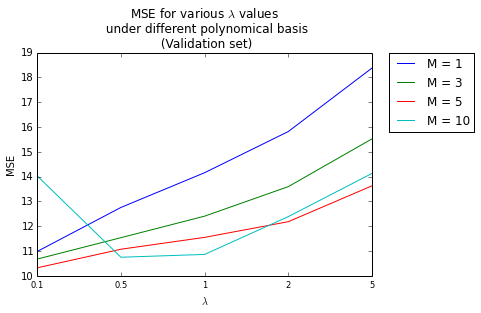

In [75]:
# Adding label to the plot
plt.plot(range(len(errorM1)),errorM1,label='M = 1')
plt.plot(range(len(errorM3)),errorM3,label='M = 3')
plt.plot(range(len(errorM5)),errorM5,label='M = 5')
plt.plot(range(len(errorM10)),errorM10,label='M = 10')
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.title('MSE for various $\lambda$ values \n under different polynomical basis \n (Validation set)')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pl.savefig('../ImageFiles/HW1/MSEValidationRR3.2.pdf')
plt.show()

# Test 2

In [76]:
Train1_X = regressBData()[0]
Train1_Y = regressBData()[1]
Test1_X = regressAData()[0]
Test1_Y = regressAData()[1]

M =  1

In [77]:
ridgeParamLambda0_1M1 = ridgeRegression(Train1_X,Train1_Y,0.1,1)[0]
ridgeParamLambda0_5M1 = ridgeRegression(Train1_X,Train1_Y,0.5,1)[0]
ridgeParamLambda1M1 = ridgeRegression(Train1_X,Train1_Y,1,1)[0]
ridgeParamLambda2M1 = ridgeRegression(Train1_X,Train1_Y,2,1)[0]
ridgeParamLambda5M1 = ridgeRegression(Train1_X,Train1_Y,5,1)[0]

In [78]:
errorLambda0_1M1 = LBFRidgeRegression(ridgeParamLambda0_1M1,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M1 = LBFRidgeRegression(ridgeParamLambda0_5M1,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M1 = LBFRidgeRegression(ridgeParamLambda1M1,valid1_X ,valid1_Y,1)[1]
errorLambda2M1 = LBFRidgeRegression(ridgeParamLambda2M1,valid1_X ,valid1_Y,2)[1]
errorLambda5M1 = LBFRidgeRegression(ridgeParamLambda5M1,valid1_X ,valid1_Y,5)[1]


M = 3

In [79]:
ridgeParamLambda0_1M3 = ridgeRegression(Train1_X,Train1_Y,0.1,3)[0]
ridgeParamLambda0_5M3 = ridgeRegression(Train1_X,Train1_Y,0.5,3)[0]
ridgeParamLambda1M3 = ridgeRegression(Train1_X,Train1_Y,1,3)[0]
ridgeParamLambda2M3 = ridgeRegression(Train1_X,Train1_Y,2,3)[0]
ridgeParamLambda5M3 = ridgeRegression(Train1_X,Train1_Y,5,3)[0]

In [80]:
errorLambda0_1M3 = LBFRidgeRegression(ridgeParamLambda0_1M3,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M3 = LBFRidgeRegression(ridgeParamLambda0_5M3,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M3 = LBFRidgeRegression(ridgeParamLambda1M3,valid1_X ,valid1_Y,1)[1]
errorLambda2M3 = LBFRidgeRegression(ridgeParamLambda2M3,valid1_X ,valid1_Y,2)[1]
errorLambda5M3 = LBFRidgeRegression(ridgeParamLambda5M3,valid1_X ,valid1_Y,5)[1]

M = 5

In [81]:
ridgeParamLambda0_1M5 = ridgeRegression(Train1_X,Train1_Y,0.1,5)[0]
ridgeParamLambda0_5M5 = ridgeRegression(Train1_X,Train1_Y,0.5,5)[0]
ridgeParamLambda1M5 = ridgeRegression(Train1_X,Train1_Y,1,5)[0]
ridgeParamLambda2M5 = ridgeRegression(Train1_X,Train1_Y,2,5)[0]
ridgeParamLambda5M5 = ridgeRegression(Train1_X,Train1_Y,5,5)[0]

In [82]:
errorLambda0_1M5 = LBFRidgeRegression(ridgeParamLambda0_1M5,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M5 = LBFRidgeRegression(ridgeParamLambda0_5M5,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M5 = LBFRidgeRegression(ridgeParamLambda1M5,valid1_X ,valid1_Y,1)[1]
errorLambda2M5 = LBFRidgeRegression(ridgeParamLambda2M5,valid1_X ,valid1_Y,2)[1]
errorLambda5M5 = LBFRidgeRegression(ridgeParamLambda5M5,valid1_X ,valid1_Y,5)[1]

M = 10

In [83]:
ridgeParamLambda0_1M10 = ridgeRegression(Train1_X,Train1_Y,0.1,10)[0]
ridgeParamLambda0_5M10 = ridgeRegression(Train1_X,Train1_Y,0.5,10)[0]
ridgeParamLambda1M10 = ridgeRegression(Train1_X,Train1_Y,1,10)[0]
ridgeParamLambda2M10 = ridgeRegression(Train1_X,Train1_Y,2,10)[0]
ridgeParamLambda5M10 = ridgeRegression(Train1_X,Train1_Y,5,10)[0]

In [84]:
errorLambda0_1M10 = LBFRidgeRegression(ridgeParamLambda0_1M10,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M10 = LBFRidgeRegression(ridgeParamLambda0_5M10,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M10 = LBFRidgeRegression(ridgeParamLambda1M10,valid1_X ,valid1_Y,1)[1]
errorLambda2M10 = LBFRidgeRegression(ridgeParamLambda2M10,valid1_X ,valid1_Y,2)[1]
errorLambda5M10 = LBFRidgeRegression(ridgeParamLambda5M10,valid1_X ,valid1_Y,5)[1]

In [85]:
errorM1 = [errorLambda0_1M1,errorLambda0_5M1,errorLambda1M1,errorLambda2M1,errorLambda5M1]
errorM3 = [errorLambda0_1M3,errorLambda0_5M3,errorLambda1M3,errorLambda2M3,errorLambda5M3]
errorM5 = [errorLambda0_1M5,errorLambda0_5M5,errorLambda1M5,errorLambda2M5,errorLambda5M5]
errorM10 = [errorLambda0_1M10,errorLambda0_5M10,errorLambda1M10,errorLambda2M10,errorLambda5M10]
W1 = ['0.1','0.5','1','2','5']

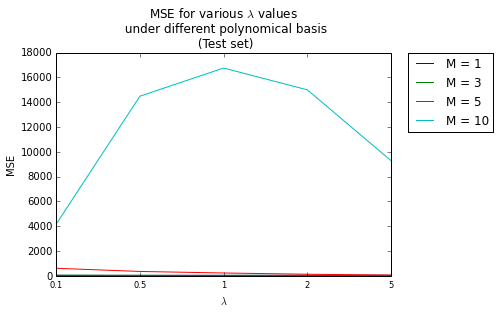

In [87]:
# Adding label to the plot
plt.plot(range(len(errorM1)),errorM1,label='M = 1')
plt.plot(range(len(errorM3)),errorM3,label='M = 3')
plt.plot(range(len(errorM5)),errorM5,label='M = 5')
plt.plot(range(len(errorM10)),errorM10,label='M = 10')
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.title('MSE for various $\lambda$ values \n under different polynomical basis \n (Test set)')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#pl.savefig('../ImageFiles/HW1/PolyBasis0.pdf')
pl.savefig('../ImageFiles/HW1/MSETestRR3.2.pdf')
plt.show()

# Question 4 (Sparsity and LASSO)

In [374]:
# Data for this question
import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def lassoTrainData():
    return getData('../DataFiles/HW1/lasso_train.txt')

def lassoValData():
    return getData('../DataFiles/HW1/lasso_validate.txt')

def lassoTestData():
    return getData('../DataFiles/HW1/lasso_test.txt')


In [375]:
from sklearn import linear_model

clf0_1 = linear_model.Lasso(alpha=0.1,fit_intercept=False) # alpha is the shrinkage parameter
clf0_5 = linear_model.Lasso(alpha=0.5,fit_intercept=False)
clf1 = linear_model.Lasso(alpha=1,fit_intercept=False)
clf2 = linear_model.Lasso(alpha=2,fit_intercept=False)
clf5 = linear_model.Lasso(alpha=5,fit_intercept=False)

In [376]:
def sineBasisFunction(X,y,n=13):
    designMat = np.zeros((len(X),n))
    designMat[:,0] = X.ravel()
    for i in range(1,n):
        #print([a**i for a in X])
        designMat[:,i] = [np.sin(0.4*np.pi*a*i) for a in X]
    return(designMat,y)

In [377]:
X = lassoTrainData()[0]
y = lassoTrainData()[1]

In [378]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]

In [379]:
clf0_1.fit(designMat, outcome)
lambda0_1coeff = clf0_1.coef_
lambda0_1coeff

array([ 0.        ,  0.        ,  5.49526681,  0.33802335,  0.        ,
        1.12455954,  2.28295397,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ])

In [380]:
clf0_5.fit(designMat, outcome)
lambda0_5coeff = clf0_5.coef_
lambda0_5coeff

array([ 0.        ,  0.        ,  4.56610215,  0.76841601,  0.        ,
        0.        ,  2.41591679,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ])

In [381]:
clf1.fit(designMat, outcome)
lambda1coeff = clf1.coef_
lambda1coeff

array([ 0.        ,  0.        ,  4.25260727,  0.02250036,  0.        ,
        0.        ,  1.63404412,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ])

In [382]:
clf2.fit(designMat, outcome)
lambda2coeff =clf2.coef_
lambda2coeff

array([ 0.        ,  0.        ,  2.56819399,  0.        ,  0.        ,
        0.        ,  0.1812299 ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ])

In [383]:
clf5.fit(designMat, outcome)
lambda5coeff =clf5.coef_
lambda5coeff

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])

## Using ridge regression on the same data

In [384]:
def ridgeRegressionGeneral(X,y,lambdaShrink):
    designMat = X
    m = X.shape[1]
    y = y.ravel() 
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)+lambdaShrink*np.identity(m)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)
    

In [390]:
ridgeCoeff0_1 = ridgeRegressionGeneral(designMat,y,0.1)[0]

In [391]:
ridgeCoeff0_5 = ridgeRegressionGeneral(designMat,y,0.5)[0]

In [392]:
ridgeCoeff1 = ridgeRegressionGeneral(designMat,y,1)[0]

In [393]:
ridgeCoeff2 = ridgeRegressionGeneral(designMat,y,2)[0]

In [394]:
ridgeCoeff5 = ridgeRegressionGeneral(designMat,y,5)[0]

# Validation

In [397]:
X = lassoValData()[0]
y = lassoValData()[1]

In [398]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]


In [399]:
error = [a - b for a,b in zip(np.dot(designMat,lambda0_1coeff),y)]
SSELassos0_1 = sum([a**2 for a in error])
print SSELassos0_1
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff0_1),y)]
SSERidge0_1 = sum([a**2 for a in error])
print SSERidge0_1

[ 1.16429323]
[ 0.52224939]


In [400]:
error = [a - b for a,b in zip(np.dot(designMat,lambda0_5coeff),y)]
SSELassos0_5 = sum([a**2 for a in error])
print SSELassos0_5
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff0_5),y)]
SSERidge0_5 = sum([a**2 for a in error])
print SSERidge0_5

[ 8.18185929]
[ 1.5720065]


In [401]:
error = [a - b for a,b in zip(np.dot(designMat,lambda1coeff),y)]
SSELassos1 = sum([a**2 for a in error])
print SSELassos1
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff1),y)]
SSERidge1 = sum([a**2 for a in error])
print SSERidge1

[ 25.4071393]
[ 4.03325155]


In [404]:
error = [a - b for a,b in zip(np.dot(designMat,lambda2coeff),y)]
SSELassos2 = sum([a**2 for a in error])
print SSELassos2
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff2),y)]
SSERidge2 = sum([a**2 for a in error])
print SSERidge2

[ 83.28028138]
[ 10.84256721]


In [405]:
error = [a - b for a,b in zip(np.dot(designMat,lambda5coeff),y)]
SSELassos5 = sum([a**2 for a in error])
print SSELassos5
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff5),y)]
SSERidge5 = sum([a**2 for a in error])
print SSERidge5

[ 218.05906373]
[ 34.73147143]


# Test

In [406]:
X = lassoTestData()[0]
y = lassoTestData()[1]

In [407]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]

In [408]:
clf0_1.fit(designMat, outcome)

Lasso(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [409]:
clf0_1.coef_

array([ 0.        ,  0.        ,  5.66461255,  0.17402743,  0.        ,
        1.0518419 ,  2.2725577 ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ])

In [410]:
ridgeRegressionGeneral(designMat,y,0.1)[0]

array([ 1.69196469,  1.82395841,  2.26368116,  1.48822701,  0.82330316,
        1.00200703,  1.36977028,  0.98871651,  0.03481447, -0.43858023,
       -0.01777008,  0.38609276, -0.32592539])